### Results 

The test set is evaluated with the saved TD-CNN-LSTM models. The performance metrics and confusion matrix are displayed. 

In [ ]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix

folder_path = "/Users/nanthininarayanan/Desktop/Courses/BDD/Code Database/testpred" 

# Get a list of all file paths in the folder
file_paths = glob.glob(os.path.join(folder_path, "*"))

test_tensors = []

# Iterate over the file paths and load the test tensors
for file_path in file_paths:
    tensor = np.load(file_path)
    test_tensors.append(tensor)

# Stack the arrays along the third axis (i.e., axis=2)
stacked_array = np.stack((test_tensors[0], test_tensors[1], test_tensors[2], test_tensors[3], test_tensors[4], test_tensors[5], test_tensors[6], test_tensors[7], test_tensors[8], test_tensors[9]), axis=2)

In [ ]:
# Calculate the average along the third axis (i.e., axis=2)
average_array = np.mean(stacked_array, axis=2)

# Print the shape of the resulting array to verify it is of size (1, 8)
print(average_array.shape)

predicted_labels = np.argmax(average_array, axis=1)

#load labels
labels_file = '/Users/nanthininarayanan/Desktop/Courses/BDD/Code Database/testlabels/Test_labels.npy'
test_labels = np.load(labels_file)
# Count the number of correct predictions
num_correct = np.sum(predicted_labels == test_labels)

# Calculate the accuracy
accuracy = num_correct / len(test_labels)

# Print the accuracy
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 79.27%


In [ ]:
#Evaluate performance 
print(classification_report(test_labels, predicted_labels))
Acc= (np.count_nonzero(test_labels==predicted_labels))/len(predicted_labels)*100
print('Acc:',Acc)
#Display confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       685
           1       0.74      0.42      0.54       261
           2       0.71      0.80      0.75      1178
           3       0.83      0.89      0.86      1164
           4       0.76      0.76      0.76      1016
           5       0.89      0.77      0.83        83
           6       0.90      0.74      0.81        89
           7       0.85      0.59      0.69       169

    accuracy                           0.79      4645
   macro avg       0.82      0.73      0.77      4645
weighted avg       0.79      0.79      0.79      4645

Acc: 79.26803013993542
[[ 600    6   35   16   17    0    0   11]
 [  16  110   72    4   52    2    3    2]
 [  13   16  938   94  113    2    0    2]
 [   3    0   85 1037   36    2    1    0]
 [  17    5  144   76  768    2    2    2]
 [   0    0    6    7    5   64    1    0]
 [   2    0   13    4    4    0   66    0]
 [  15   11   19    5   2

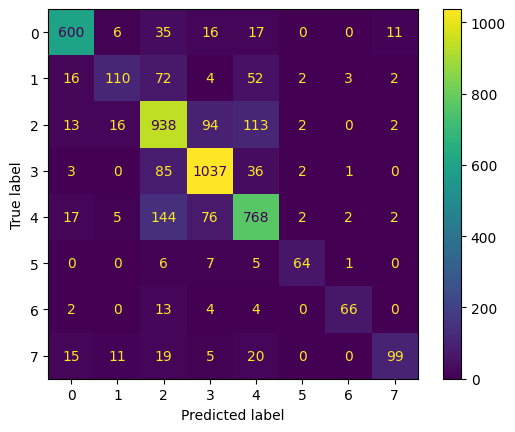

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

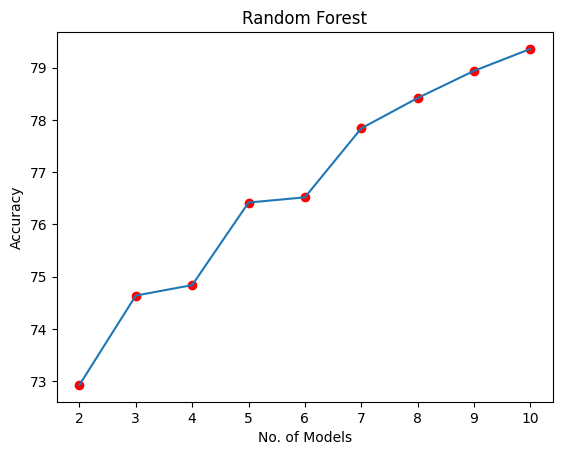

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
x = [72.93, 74.64, 74.84, 76.42, 76.52, 77.84, 78.42, 78.94, 79.36]
y = [2,3,4,5,6,7,8,9,10]

# Create a line plot
plt.plot(y, x)
plt.scatter(y, x, color='red')
# Add labels and title
plt.xlabel('No. of Models')
plt.ylabel('Accuracy')
plt.title('Random Forest')

# Show the plot
plt.show()
